## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.

#### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

In [2]:
# reading the dataset

houses = pd.read_csv("train.csv")
houses

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [3]:
# shape of the dataset

houses.shape

(1460, 81)

In [4]:
# inspecting the columns of the dataframe

houses.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# inspecting the dataframe

houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# statistics of the continuous variables 

houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### 2. Data Cleaning
* Inspecting the null values

In [7]:
# inspecting the column-wise null count

round((houses.isnull().sum()/len(houses))*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [8]:
# dropping columns with extremely high percentages of missing values
# we can impute these missing values with a category, but even then the data would be too much skewed

houses.drop(['Alley','PoolQC','Fence','MiscFeature'],axis = 1,inplace = True)
houses.shape

(1460, 77)

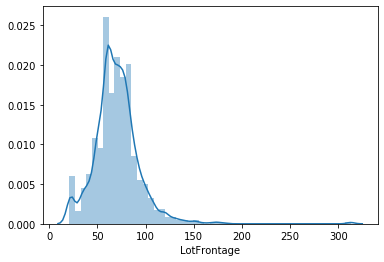

In [9]:
# inspecting LotFrontage

sns.distplot(houses['LotFrontage'])

In [10]:
# imputing the missing values in LotFrontage with the mean i.e. 70

houses['LotFrontage'].fillna(value = 70,inplace = True)
houses['LotFrontage'].isnull().sum()

0

In [11]:
# for column MasVnrType we are dropping the rows with the missing values

houses = houses[~houses['MasVnrType'].isnull()]
houses['MasVnrType'].isnull().sum()

0

In [12]:
# for column MasVnrArea we are dropping the rows with the missing values

houses = houses[~houses['MasVnrArea'].isnull()]
houses['MasVnrArea'].isnull().sum()

0

In [13]:
# for the column BsmtQual
# we are imputing the missing values with 'No Basement'

houses['BsmtQual'].fillna(value = 'No Basement',inplace = True)
houses['BsmtQual'].isnull().sum()

0

In [14]:
# for the column BsmtCond
# we are imputing the missing values with 'No Basement'

houses['BsmtCond'].fillna(value = 'No Basement',inplace = True)
houses['BsmtCond'].isnull().sum()

0

In [15]:
# for the column BsmtExposure
# we are imputing the missing values with 'No Basement'

houses['BsmtExposure'].fillna(value = 'No Basement',inplace = True)
houses['BsmtExposure'].isnull().sum()

0

In [16]:
# for the column BsmtFinType1
# we are imputing the missing values with 'No Basement'

houses['BsmtFinType1'].fillna(value = 'No Basement',inplace = True)
houses['BsmtFinType1'].isnull().sum()

0

In [17]:
# for the column BsmtFinType2
# we are imputing the missing values with 'No Basement'

houses['BsmtFinType2'].fillna(value = 'No Basement',inplace = True)
houses['BsmtFinType2'].isnull().sum()

0

In [18]:
# for column Electrical we are dropping the rows with the missing values

houses = houses[~houses['Electrical'].isnull()]
houses['Electrical'].isnull().sum()

0

In [19]:
# for the column FireplaceQu
# we are imputing the missing values with 'No Fireplace'

houses['FireplaceQu'].fillna(value = 'No Fireplace',inplace = True)
houses['FireplaceQu'].isnull().sum()

0

In [20]:
# for the column GarageType
# we are imputing the missing values with 'No Garage'

houses['GarageType'].fillna(value = 'No Garage',inplace = True)
houses['GarageType'].isnull().sum()

0

In [21]:
# for column GarageYrBlt we are dropping the rows with the missing values

houses = houses[~houses['GarageYrBlt'].isnull()]
houses['GarageYrBlt'].isnull().sum()

0

In [22]:
# for the column GarageFinish
# we are imputing the missing values with 'No Garage'

houses['GarageFinish'].fillna(value = 'No Garage',inplace = True)
houses['GarageFinish'].isnull().sum()

0

In [23]:
# for the column GarageQual
# we are imputing the missing values with 'No Garage'

houses['GarageQual'].fillna(value = 'No Garage',inplace = True)
houses['GarageQual'].isnull().sum()

0

In [24]:
# for the column GarageCond
# we are imputing the missing values with 'No Garage'

houses['GarageCond'].fillna(value = 'No Garage',inplace = True)
houses['GarageCond'].isnull().sum()

0

In [25]:
# inspecting the column-wise null count

round((houses.isnull().sum()/len(houses))*100,2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

* Dropping the unnecessary columns.

In [26]:
houses.drop('Id',axis = 1,inplace = True)

In [27]:
# inspecting the column MSZoning

houses['MSZoning'].value_counts(normalize = True)

RL         0.799270
RM         0.140876
FV         0.045255
RH         0.008759
C (all)    0.005839
Name: MSZoning, dtype: float64

In [28]:
# dropping the column MSZoning as the data is too skewed

houses.drop('MSZoning',axis = 1,inplace = True)
houses.shape

(1370, 75)

In [29]:
houses['Street'].value_counts(normalize = True)

Pave    0.99635
Grvl    0.00365
Name: Street, dtype: float64

In [30]:
# dropping the column Street as the data is too skewed

houses.drop('Street',axis = 1,inplace = True)
houses.shape

(1370, 74)

In [31]:
houses['LandContour'].value_counts(normalize = True)

Lvl    0.901460
Bnk    0.039416
HLS    0.035036
Low    0.024088
Name: LandContour, dtype: float64

In [32]:
# dropping the column LandContour as the data is too skewed

houses.drop('LandContour',axis = 1,inplace = True)
houses.shape

(1370, 73)

In [33]:
houses['Utilities'].value_counts(normalize = True)

AllPub    0.99927
NoSeWa    0.00073
Name: Utilities, dtype: float64

In [34]:
# dropping the column Utilities as the data is too skewed

houses.drop('Utilities',axis = 1,inplace = True)
houses.shape

(1370, 72)

In [35]:
houses['LotConfig'].value_counts(normalize = True)

Inside     0.716058
Corner     0.181752
CulDSac    0.067153
FR2        0.032117
FR3        0.002920
Name: LotConfig, dtype: float64

In [36]:
# dropping the column LotConfig as the data is too skewed

houses.drop('LotConfig',axis = 1,inplace = True)
houses.shape

(1370, 71)

In [37]:
houses['LandSlope'].value_counts(normalize = True)

Gtl    0.946715
Mod    0.044526
Sev    0.008759
Name: LandSlope, dtype: float64

In [38]:
# dropping the column LandSlope as the data is too skewed

houses.drop('LandSlope',axis = 1,inplace = True)
houses.shape

(1370, 70)

In [39]:
houses['Condition1'].value_counts(normalize = True)

Norm      0.865693
Feedr     0.050365
Artery    0.032117
RRAn      0.018978
PosN      0.013869
RRAe      0.008029
PosA      0.005839
RRNn      0.003650
RRNe      0.001460
Name: Condition1, dtype: float64

In [40]:
# dropping the column Condition1 as the data is too skewed

houses.drop('Condition1',axis = 1,inplace = True)
houses.shape

(1370, 69)

In [41]:
houses['Condition2'].value_counts(normalize = True)

Norm      0.989781
Feedr     0.003650
RRNn      0.001460
PosN      0.001460
Artery    0.001460
PosA      0.000730
RRAe      0.000730
RRAn      0.000730
Name: Condition2, dtype: float64

In [42]:
# dropping the column Condition1 as the data is too skewed

houses.drop('Condition2',axis = 1,inplace = True)
houses.shape

(1370, 68)

In [43]:
houses['BldgType'].value_counts(normalize = True)

1Fam      0.845255
TwnhsE    0.081752
Duplex    0.029197
Twnhs     0.027737
2fmCon    0.016058
Name: BldgType, dtype: float64

In [44]:
# dropping the column BldgType as the data is too skewed

houses.drop('BldgType',axis = 1,inplace = True)
houses.shape

(1370, 67)

In [45]:
houses['RoofStyle'].value_counts(normalize = True)

Gable      0.775182
Hip        0.202920
Flat       0.008759
Gambrel    0.007299
Mansard    0.004380
Shed       0.001460
Name: RoofStyle, dtype: float64

In [46]:
# dropping the column RoofStyle as the data is too skewed

houses.drop('RoofStyle',axis = 1,inplace = True)
houses.shape

(1370, 66)

In [47]:
houses['RoofMatl'].value_counts(normalize = True)

CompShg    0.981752
Tar&Grv    0.007299
WdShngl    0.004380
WdShake    0.003650
Roll       0.000730
Metal      0.000730
Membran    0.000730
ClyTile    0.000730
Name: RoofMatl, dtype: float64

In [48]:
# dropping the column RoofStyle as the data is too skewed

houses.drop('RoofMatl',axis = 1,inplace = True)
houses.shape

(1370, 65)

In [49]:
houses['ExterCond'].value_counts(normalize = True)

TA    0.884672
Gd    0.100730
Fa    0.013139
Ex    0.001460
Name: ExterCond, dtype: float64

In [50]:
# dropping the column ExterCond as the data is too skewed

houses.drop('ExterCond',axis = 1,inplace = True)
houses.shape

(1370, 64)

In [51]:
houses['BsmtCond'].value_counts(normalize = True)

TA             0.904380
Gd             0.045255
Fa             0.027737
No Basement    0.021898
Po             0.000730
Name: BsmtCond, dtype: float64

In [52]:
# dropping the column BsmtCond as the data is too skewed

houses.drop('BsmtCond',axis = 1,inplace = True)
houses.shape

(1370, 63)

In [53]:
houses['BsmtFinType2'].value_counts(normalize = True)

Unf            0.859124
Rec            0.038686
LwQ            0.033577
BLQ            0.023358
No Basement    0.022628
ALQ            0.013869
GLQ            0.008759
Name: BsmtFinType2, dtype: float64

In [54]:
# dropping the column BsmtFinType2 as the data is too skewed

houses.drop('BsmtFinType2',axis = 1,inplace = True)
houses.shape

(1370, 62)

In [55]:
houses['Heating'].value_counts(normalize = True)

GasA     0.981022
GasW     0.012409
Wall     0.002920
Grav     0.002190
OthW     0.000730
Floor    0.000730
Name: Heating, dtype: float64

In [56]:
# dropping the column Heating as the data is too skewed

houses.drop('Heating',axis = 1,inplace = True)
houses.shape

(1370, 61)

In [57]:
houses['CentralAir'].value_counts(normalize = True)

Y    0.949635
N    0.050365
Name: CentralAir, dtype: float64

In [58]:
# dropping the column CentralAir as the data is too skewed

houses.drop('CentralAir',axis = 1,inplace = True)
houses.shape

(1370, 60)

In [59]:
houses['Electrical'].value_counts(normalize = True)

SBrkr    0.922628
FuseA    0.059124
FuseF    0.016058
FuseP    0.001460
Mix      0.000730
Name: Electrical, dtype: float64

In [60]:
# dropping the column Electrical as the data is too skewed

houses.drop('Electrical',axis = 1,inplace = True)
houses.shape

(1370, 59)

In [61]:
houses['Functional'].value_counts(normalize = True)

Typ     0.933577
Min2    0.023358
Min1    0.022628
Mod     0.009489
Maj1    0.007299
Maj2    0.002920
Sev     0.000730
Name: Functional, dtype: float64

In [62]:
# dropping the column Functional as the data is too skewed

houses.drop('Functional',axis = 1,inplace = True)
houses.shape

(1370, 58)

In [63]:
houses['GarageQual'].value_counts(normalize = True)

TA    0.950365
Fa    0.035036
Gd    0.010219
Ex    0.002190
Po    0.002190
Name: GarageQual, dtype: float64

In [64]:
# dropping the column GarageQual as the data is too skewed

houses.drop('GarageQual',axis = 1,inplace = True)
houses.shape

(1370, 57)

In [65]:
houses['GarageCond'].value_counts(normalize = True)

TA    0.961314
Fa    0.025547
Gd    0.006569
Po    0.005109
Ex    0.001460
Name: GarageCond, dtype: float64

In [66]:
# dropping the column GarageCond as the data is too skewed

houses.drop('GarageCond',axis = 1,inplace = True)
houses.shape

(1370, 56)

In [67]:
houses['PavedDrive'].value_counts(normalize = True)

Y    0.937226
N    0.042336
P    0.020438
Name: PavedDrive, dtype: float64

In [68]:
# dropping the column PavedDrive as the data is too skewed

houses.drop('PavedDrive',axis = 1,inplace = True)
houses.shape

(1370, 55)

In [69]:
houses['SaleType'].value_counts(normalize = True)

WD       0.867153
New      0.085401
COD      0.031387
ConLD    0.005109
CWD      0.002920
ConLI    0.002920
ConLw    0.002920
Con      0.001460
Oth      0.000730
Name: SaleType, dtype: float64

In [70]:
# dropping the column SaleType as the data is too skewed

houses.drop('SaleType',axis = 1,inplace = True)
houses.shape

(1370, 54)

In [71]:
houses['SaleCondition'].value_counts(normalize = True)

Normal     0.826277
Partial    0.087591
Abnorml    0.063504
Family     0.014599
Alloca     0.007299
AdjLand    0.000730
Name: SaleCondition, dtype: float64

In [72]:
# dropping the column SaleCondition as the data is too skewed

houses.drop('SaleCondition',axis = 1,inplace = True)
houses.shape

(1370, 53)

* Interpreting the age of the houses

In [73]:
houses['House_year_old'] = houses['YrSold']-houses['YearBuilt']
houses['House_year_old']

0        5
1       31
2        7
3       91
4        8
        ..
1455     8
1456    32
1457    69
1458    60
1459    43
Name: House_year_old, Length: 1370, dtype: int64

In [74]:
houses.drop(['YearBuilt','YrSold','MoSold','YearRemodAdd'],axis = 1,inplace = True)

#### 3. EDA

In [75]:
houses.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,House_year_old
count,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000
mean,56.054745,70.542336,10687.435036,6.181752,5.582482,109.076642,454.211679,48.418248,570.742336,1073.372263,1176.086131,353.202190,4.162044,1533.450365,0.429197,0.059124,1.577372,0.394161,2.865693,1.037956,6.551825,0.641606,1978.353285,1.869343,500.462774,97.656204,47.028467,21.031387,3.633577,16.050365,2.940146,43.170803,185194.797080,35.027737
std,41.073531,21.950673,10228.507006,1.344236,1.081480,184.589326,458.985739,164.817484,444.050989,435.558797,385.381717,439.497524,40.260837,519.489200,0.513963,0.239019,0.547455,0.502116,0.782985,0.194944,1.590884,0.644711,24.685798,0.631307,185.988074,126.805998,64.995049,60.519492,30.252215,57.422820,41.470515,503.247977,78899.705642,29.411577
min,20.000000,21.000000,1300.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35311.000000,0.000000
25%,20.000000,60.000000,7731.000000,5.000000,5.000000,0.000000,0.000000,0.000000,225.500000,808.500000,894.000000,0.000000,0.000000,1152.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,377.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,133925.000000,7.000000
50%,50.000000,70.000000,9591.000000,6.000000,5.000000,0.000000,399.500000,0.000000,477.500000,1008.000000,1098.000000,0.000000,0.000000,1479.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.500000,2.000000,484.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,167000.000000,33.000000
75%,70.000000,79.000000,11712.750000,7.000000,6.000000,171.750000,728.000000,0.000000,811.000000,1314.000000,1414.000000,737.000000,0.000000,1788.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,582.750000,171.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,217875.000000,53.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,2.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,129.000000


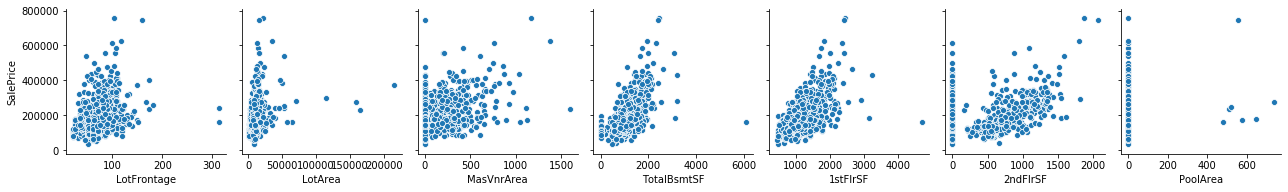

In [76]:
# visualizing some numerical variables wrt. SalePrice

varlist = ['LotFrontage','LotArea','MasVnrArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','PoolArea']
sns.pairplot(data = houses,x_vars = varlist,y_vars = 'SalePrice')

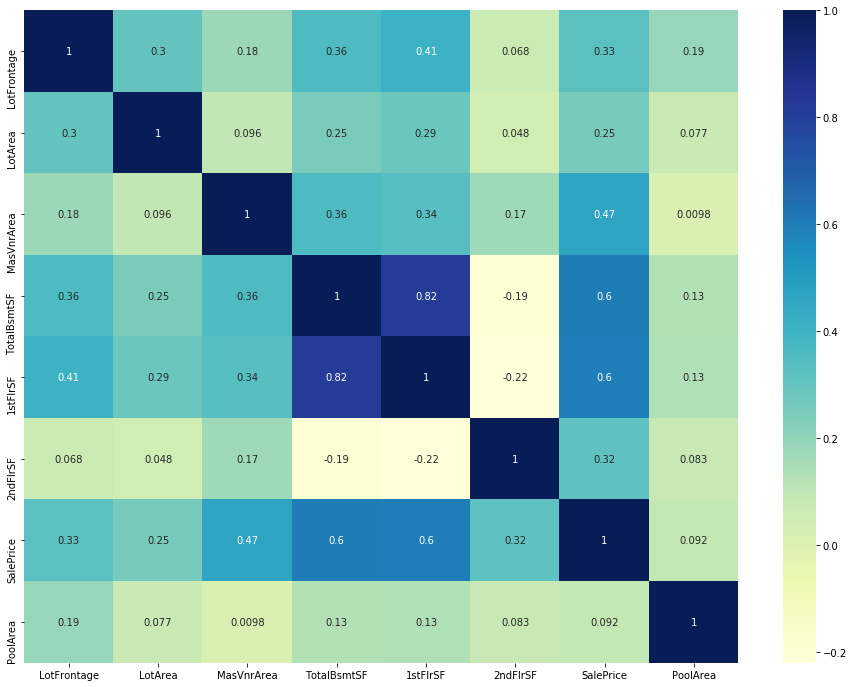

In [77]:
# another quick way to visualize the data is heatmap

varlist = ['LotFrontage','LotArea','MasVnrArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','SalePrice','PoolArea']
plt.figure(figsize = (16,12))
sns.heatmap(houses[varlist].corr(),cmap = 'YlGnBu',annot = True)

It seems like the predictor variable `SalePrice` has good correlation with the variables `TotalBsmtSF`, `1stFlrSF`.

Plotting some scatter plots:

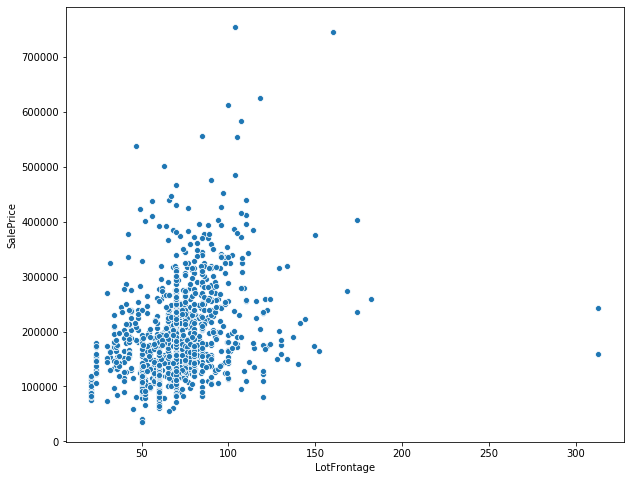

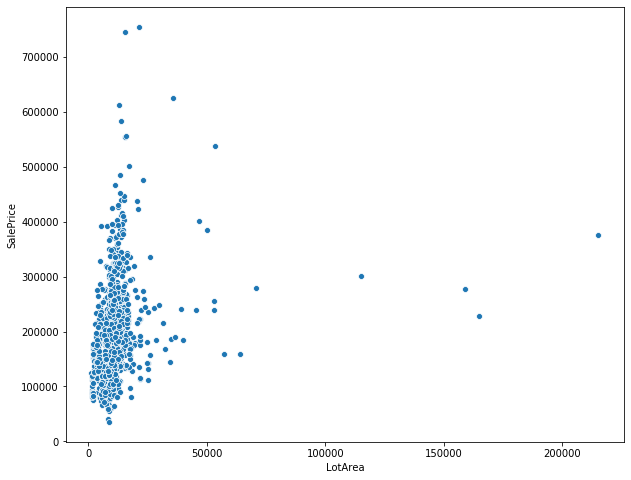

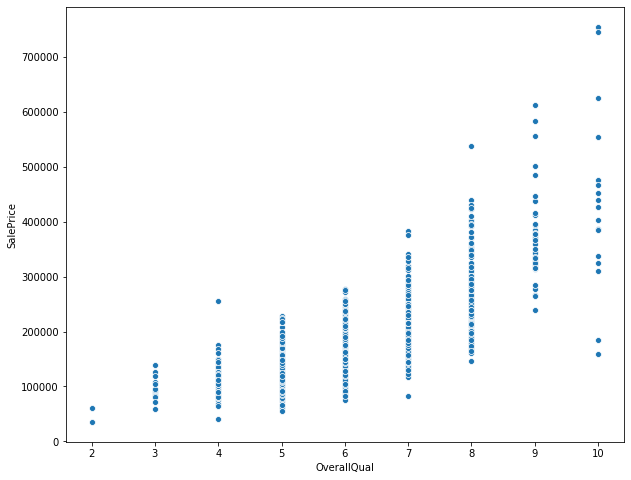

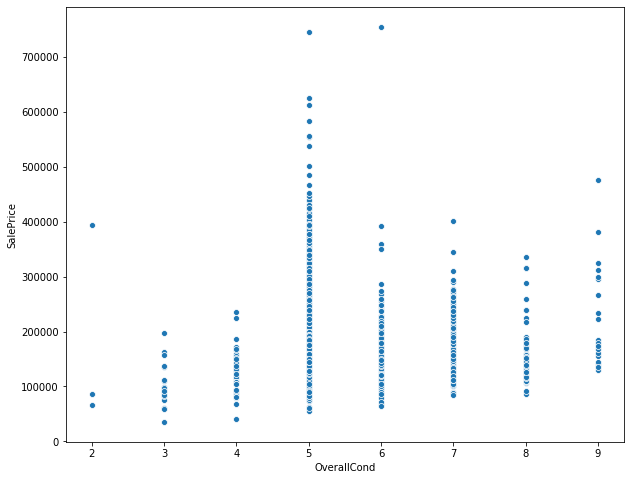

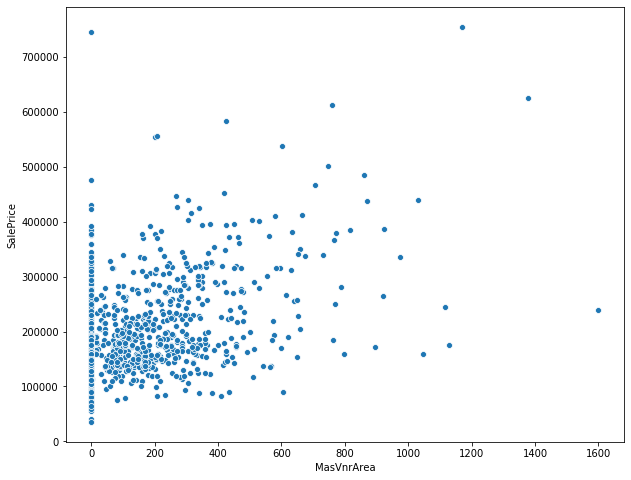

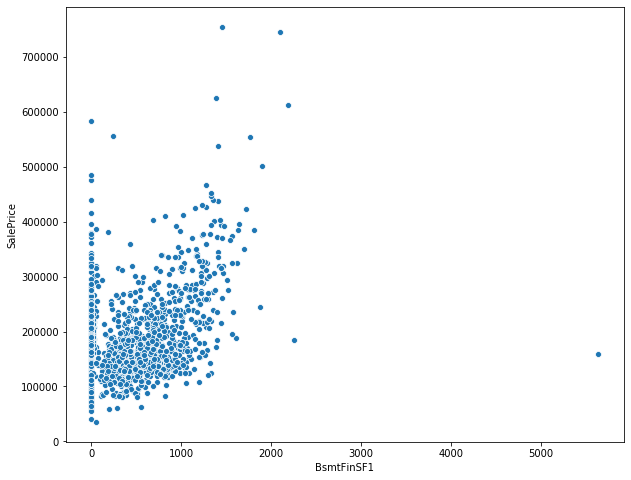

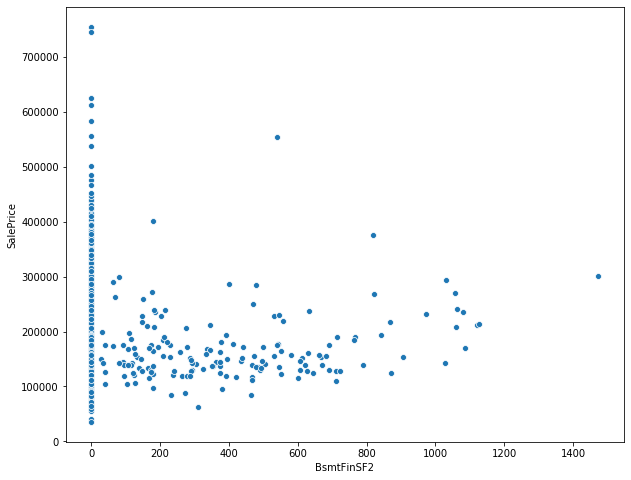

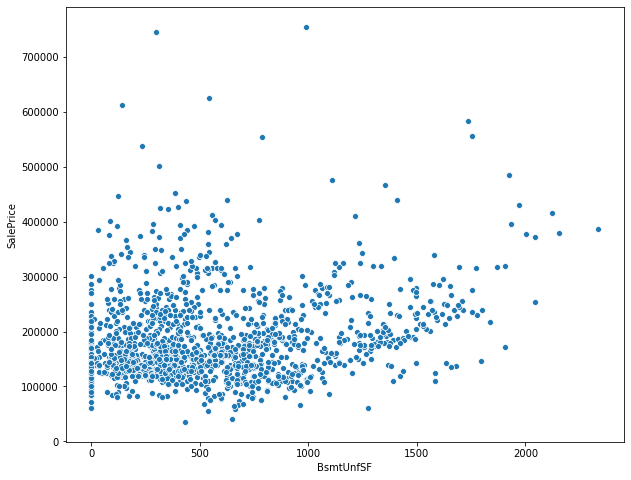

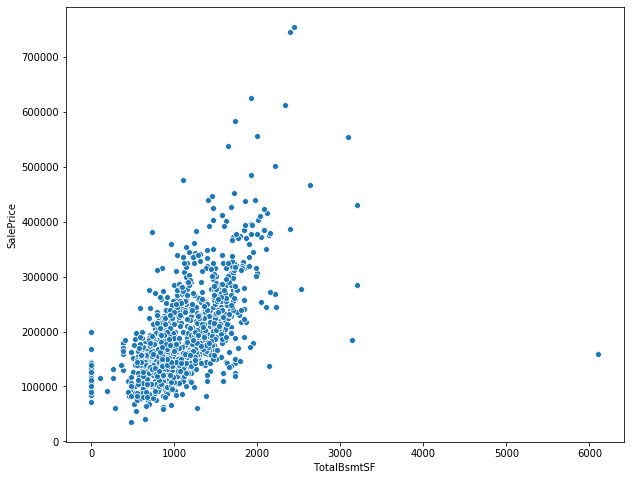

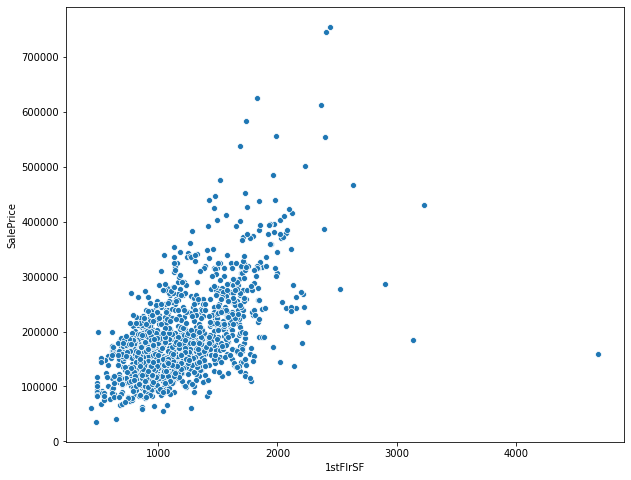

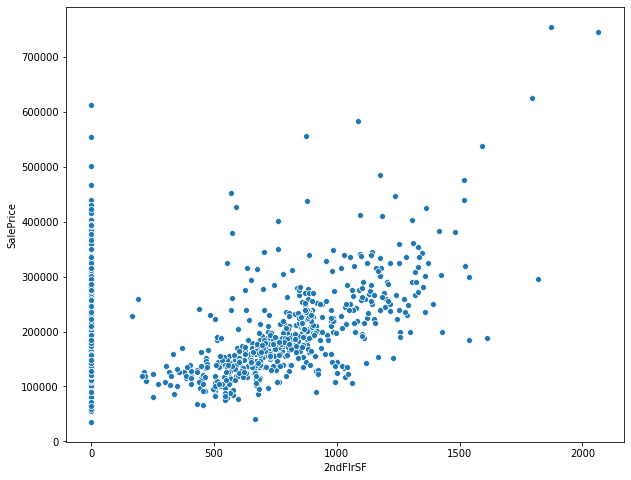

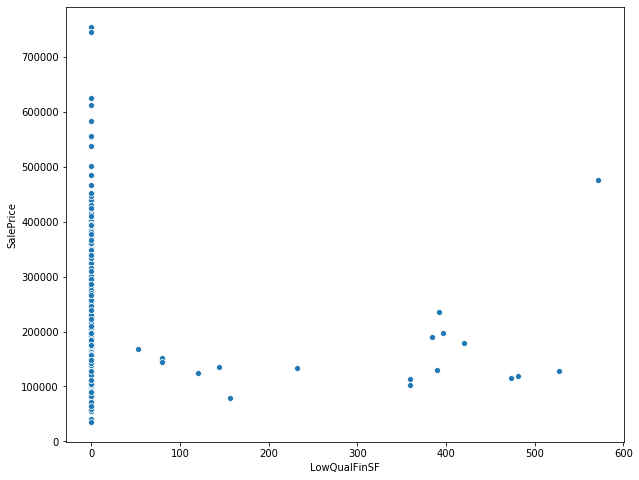

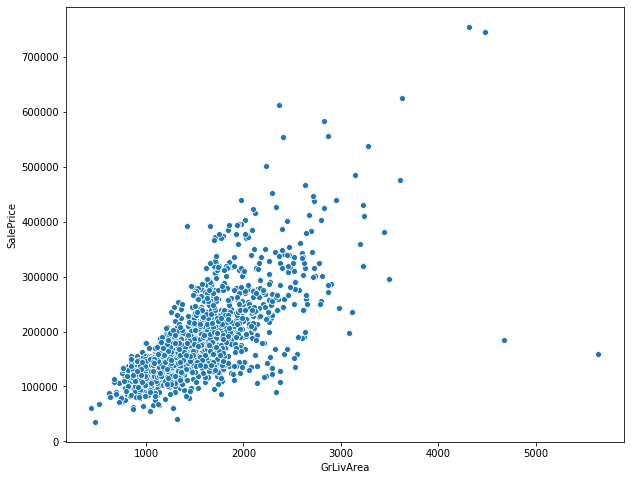

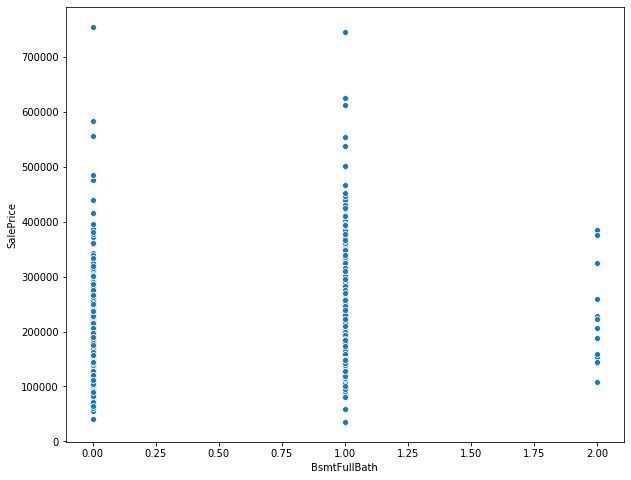

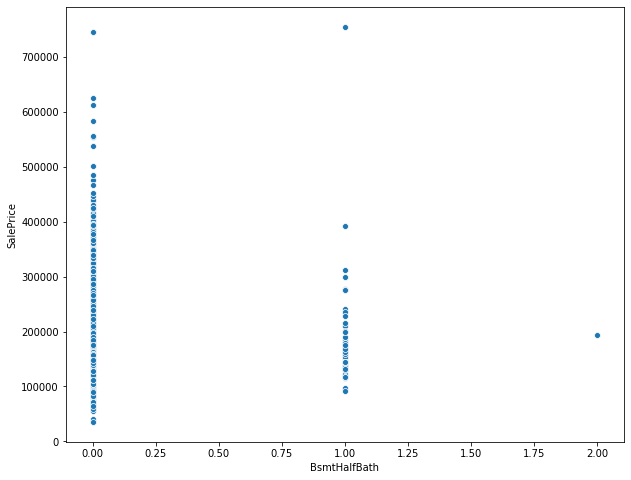

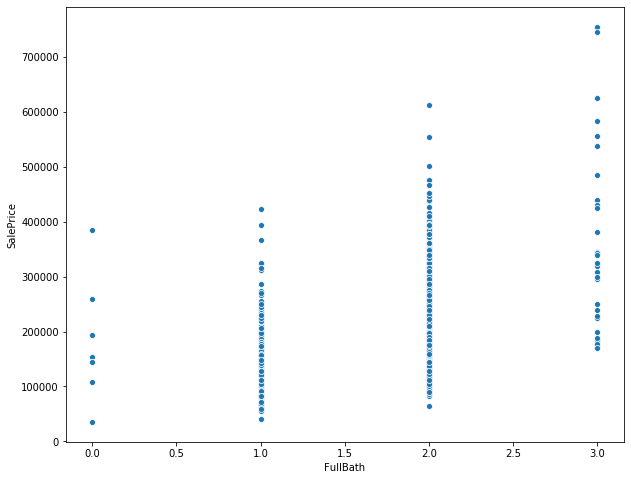

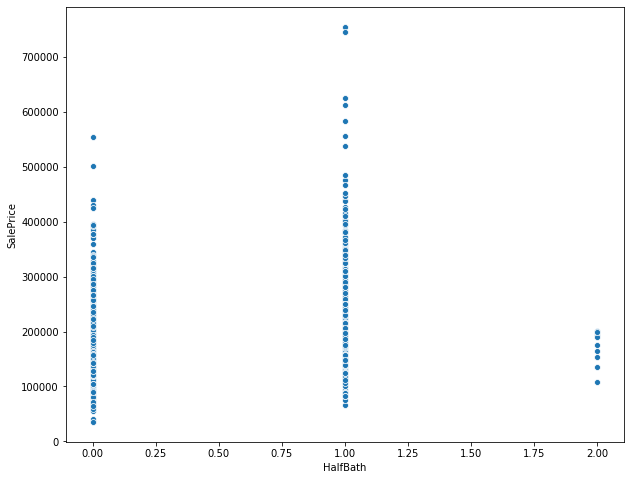

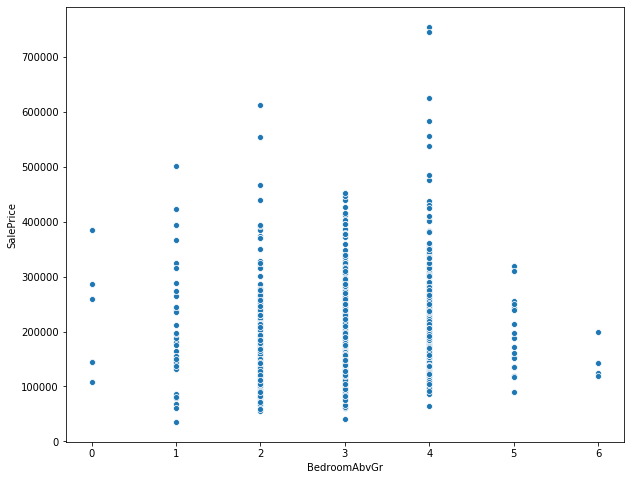

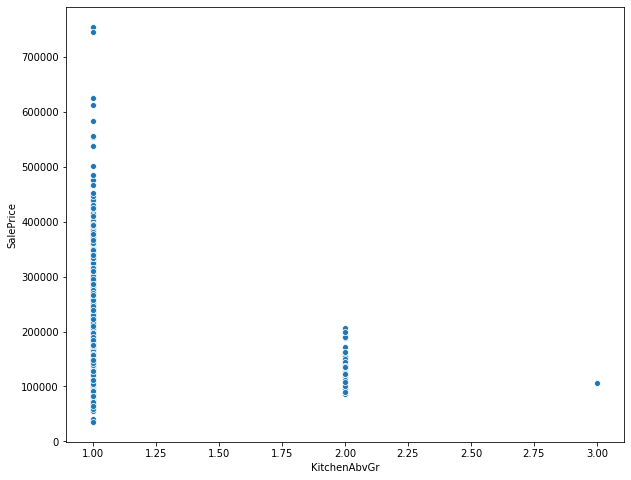

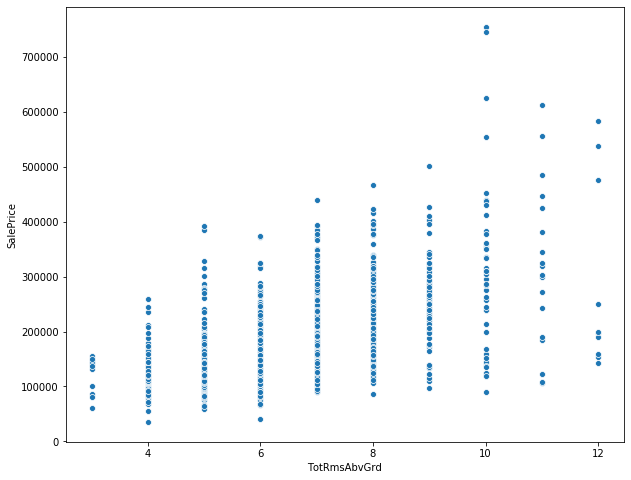

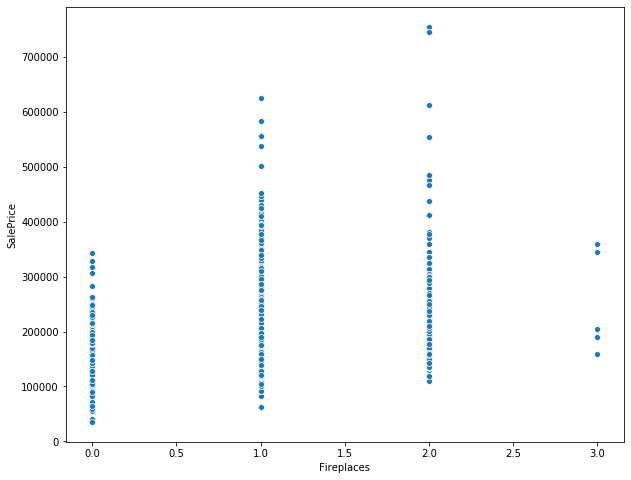

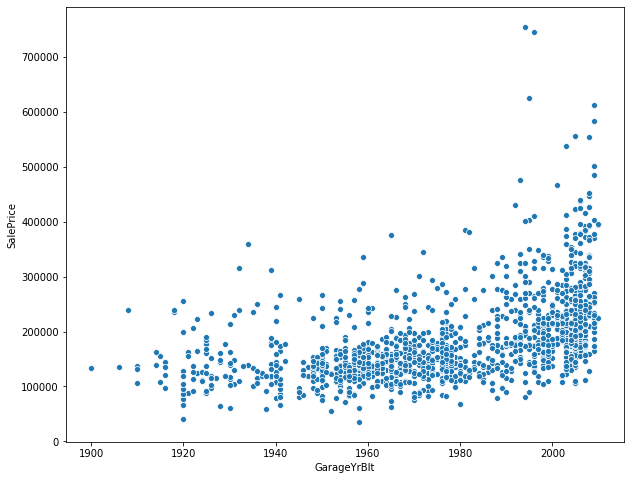

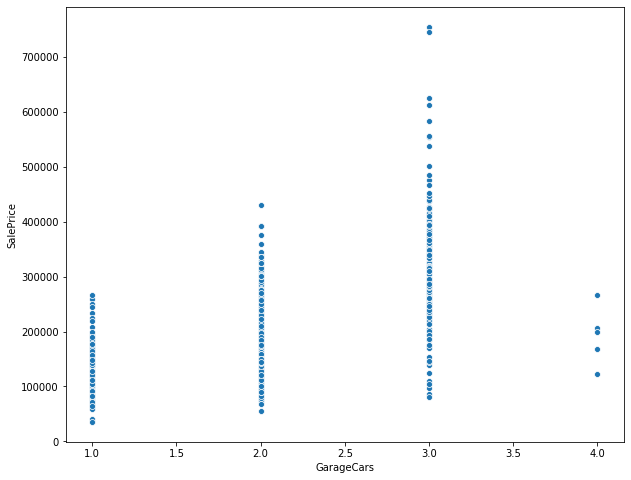

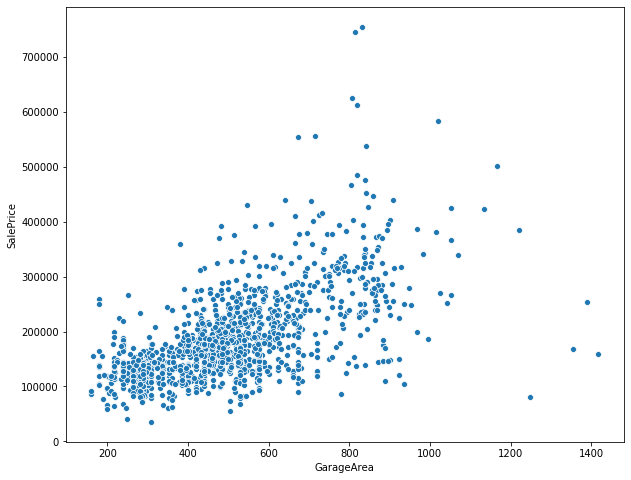

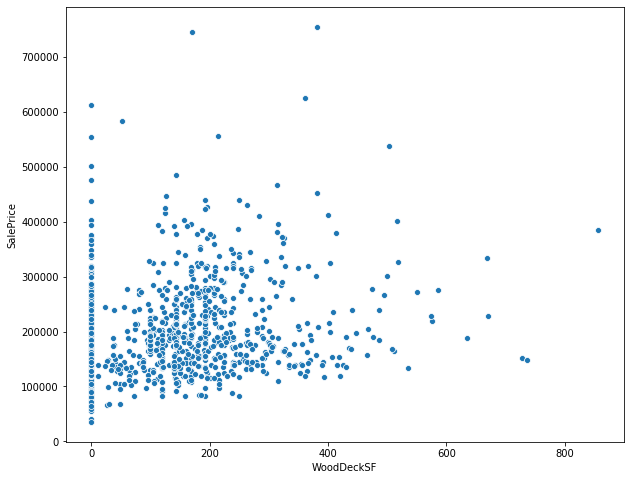

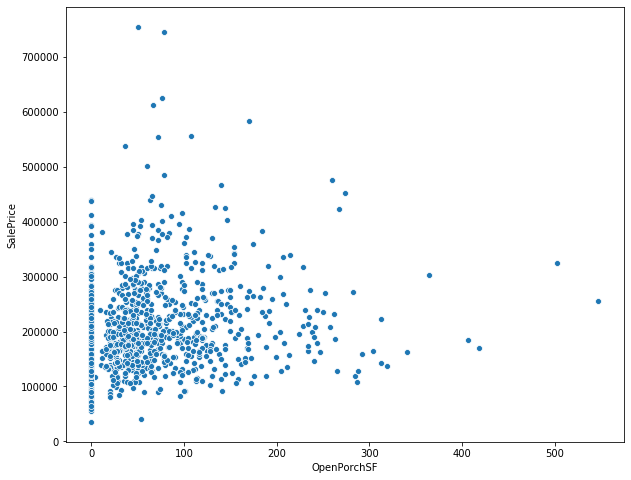

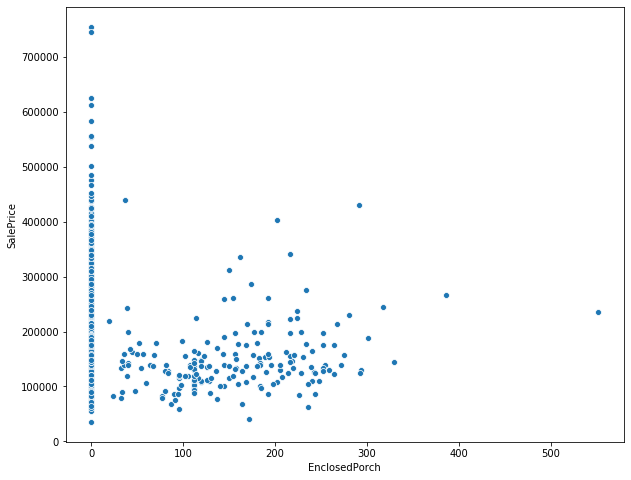

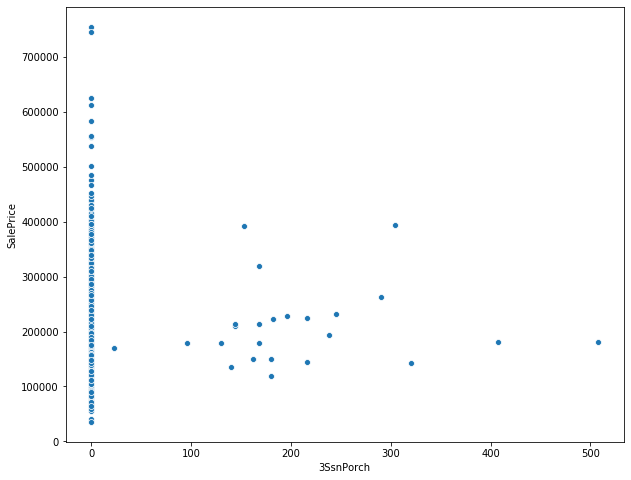

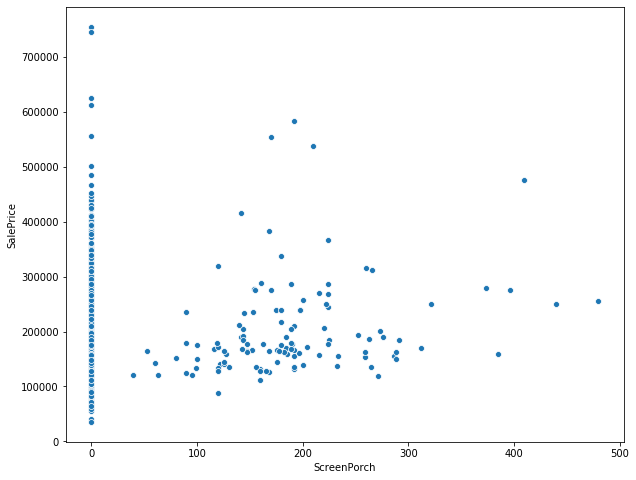

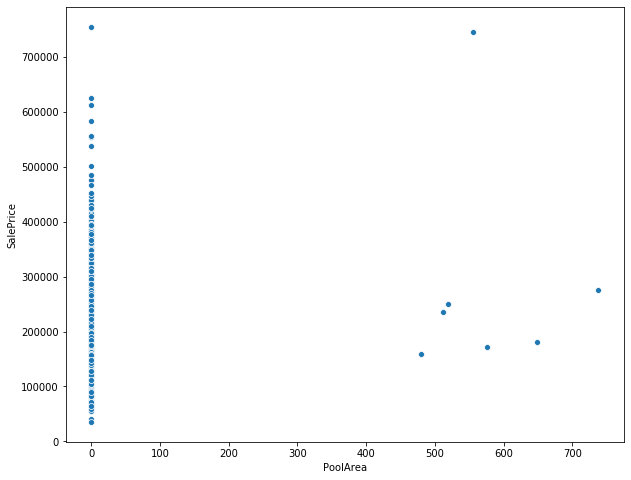

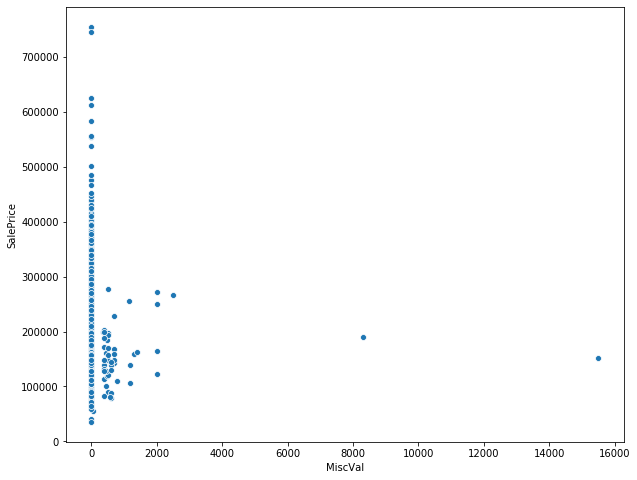

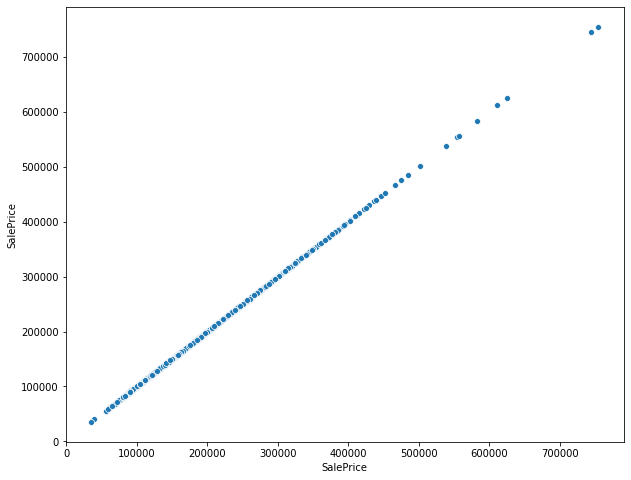

In [78]:
for i in range(2,len(houses.select_dtypes(include=['int64','float64']).columns)):
    plt.figure(figsize=(10,8))
    sns.scatterplot(x = houses.select_dtypes(include=['int64','float64']).columns[i-1],y = 'SalePrice',data = houses)

`GrLivArea`, `GarageArea`, `OpenPorchSF` have a high linear relationship with the `SalePrice` as well.

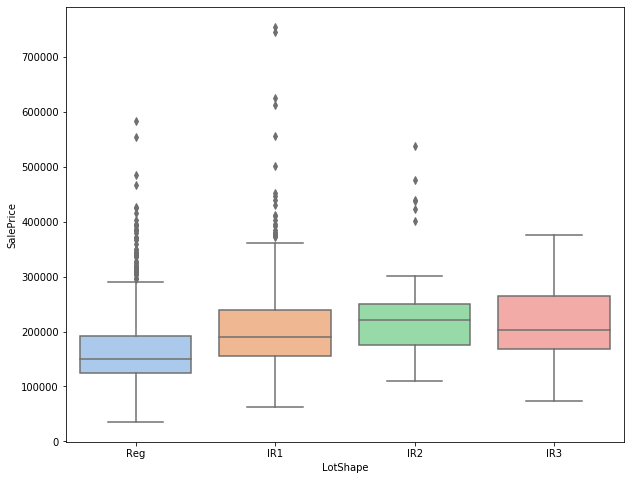

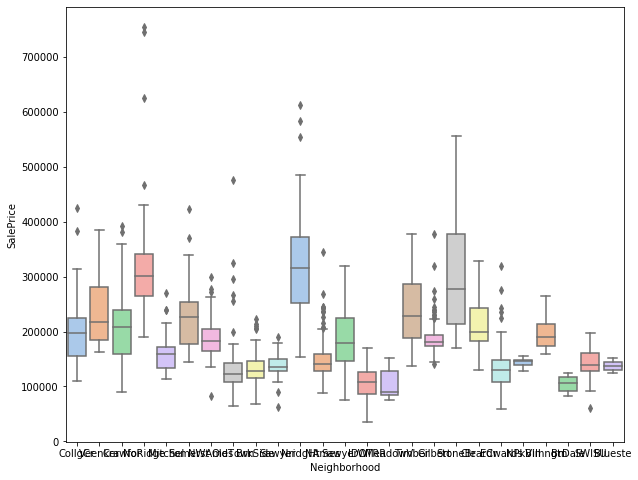

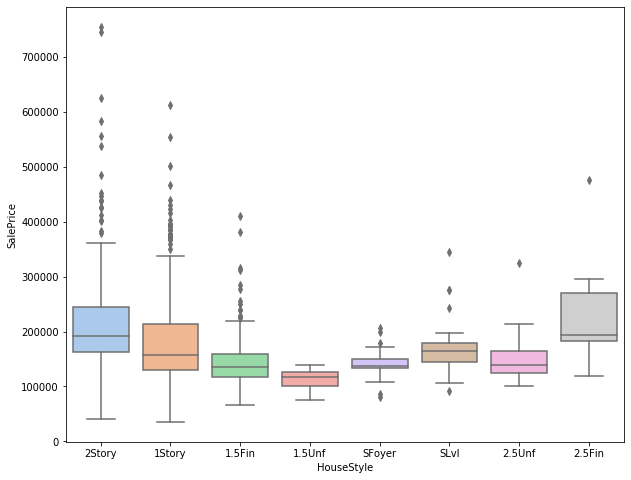

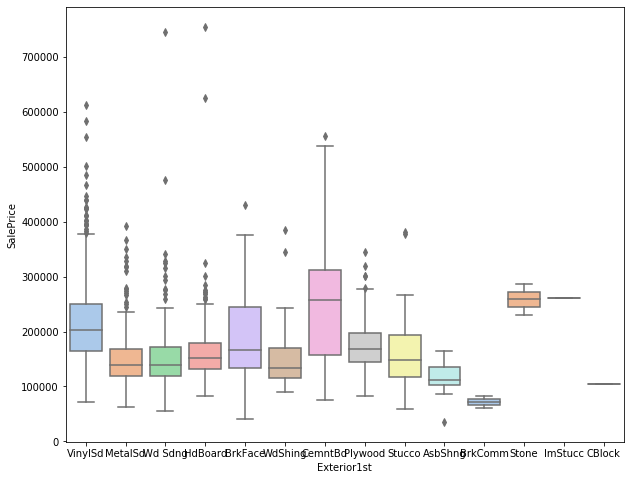

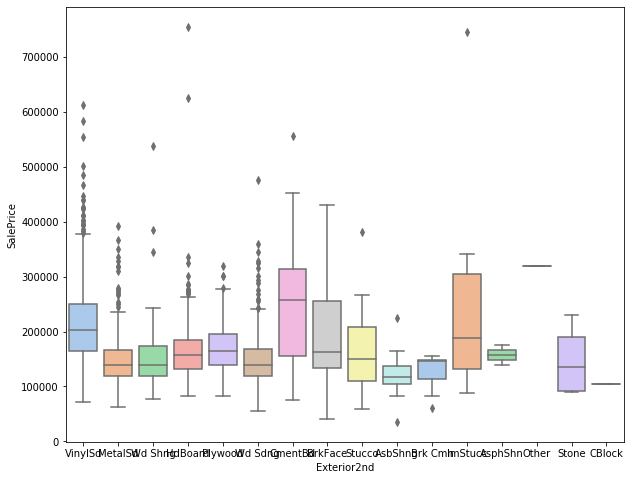

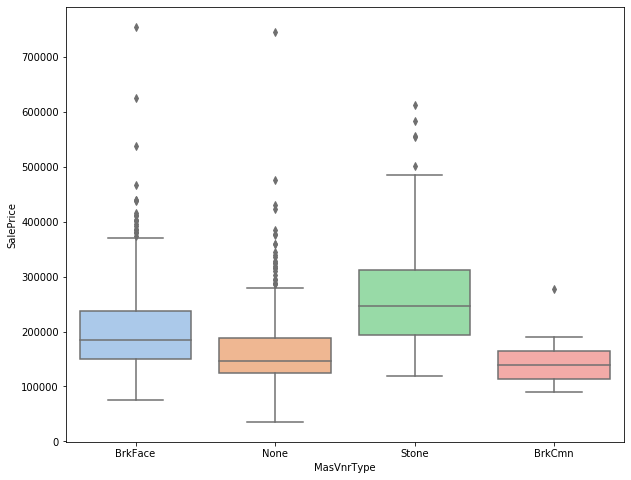

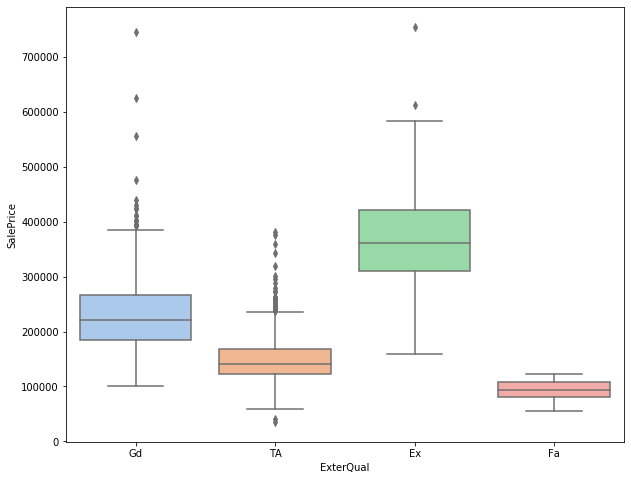

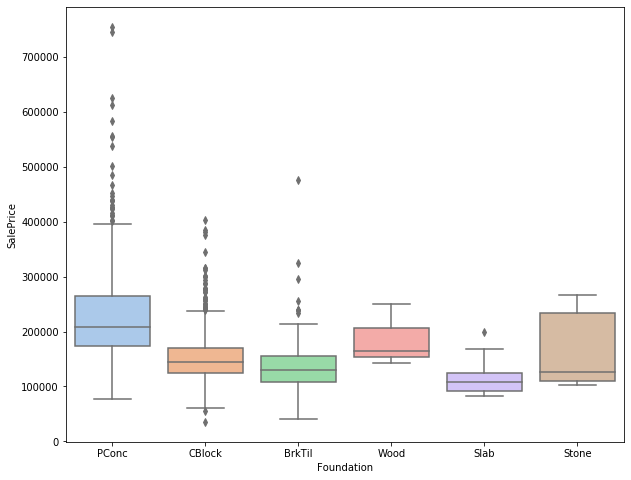

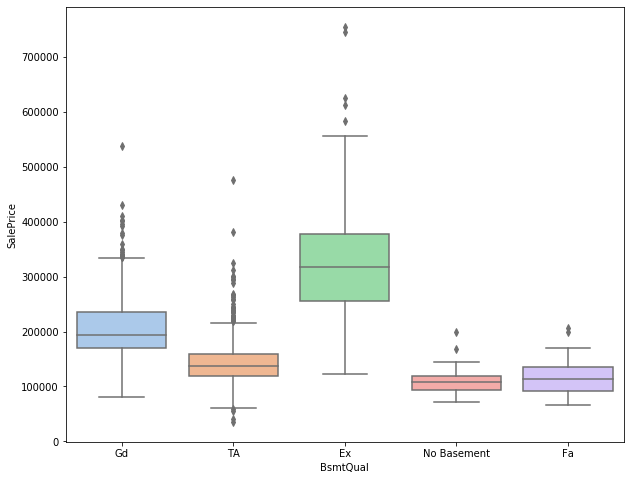

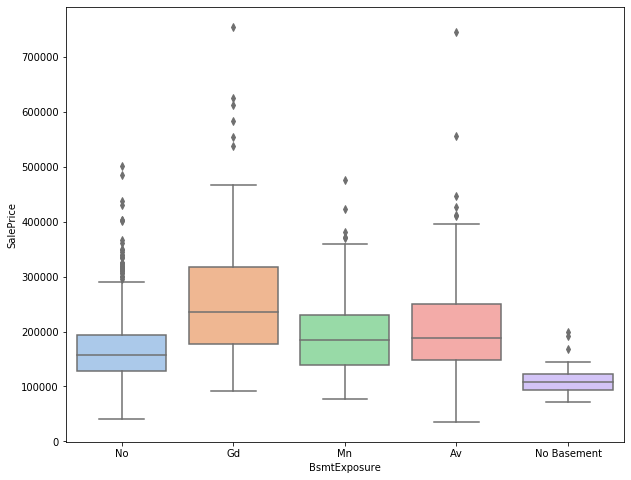

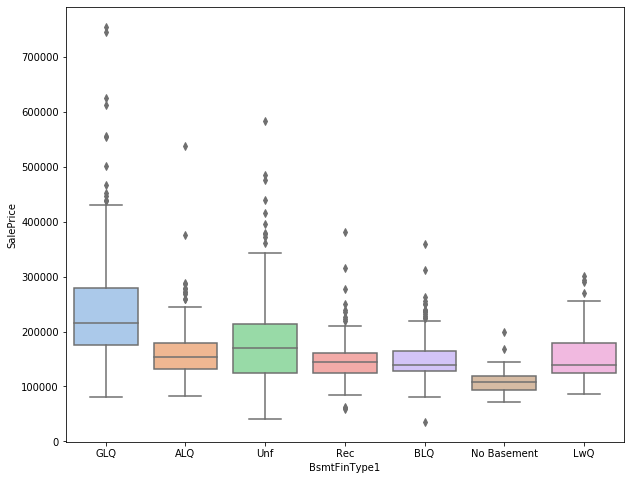

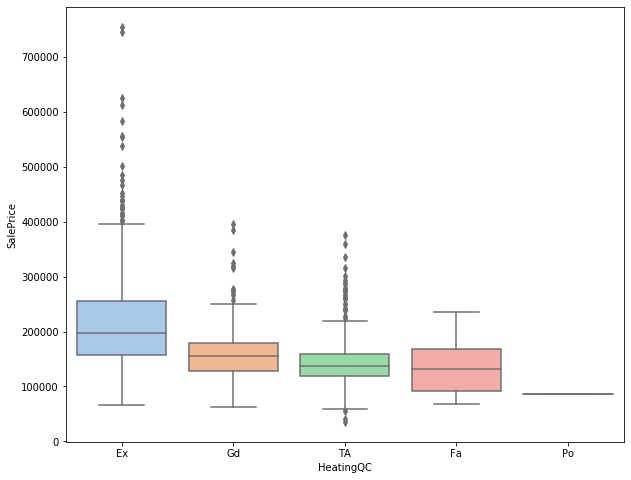

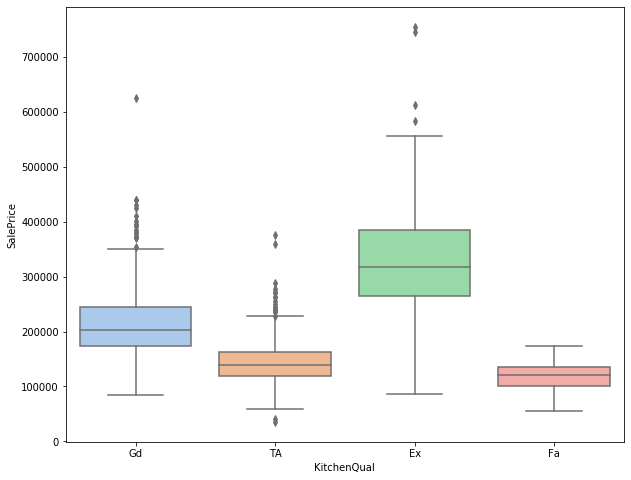

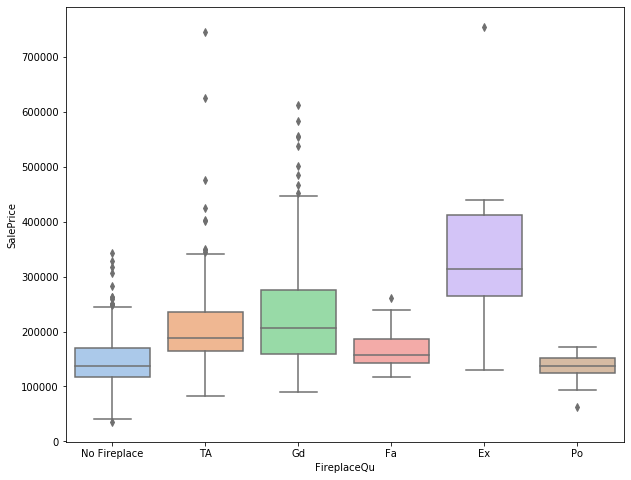

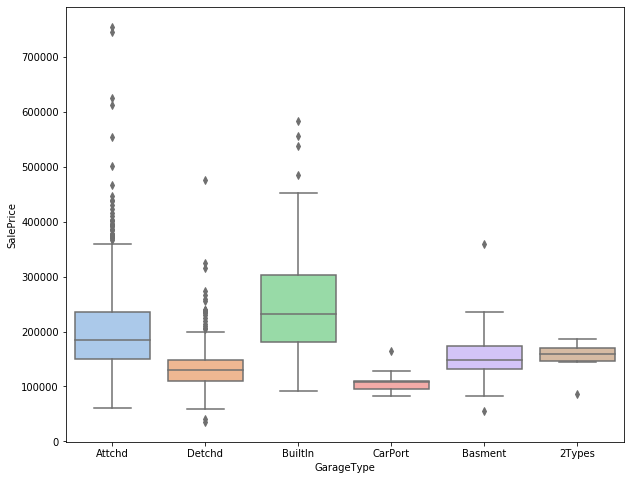

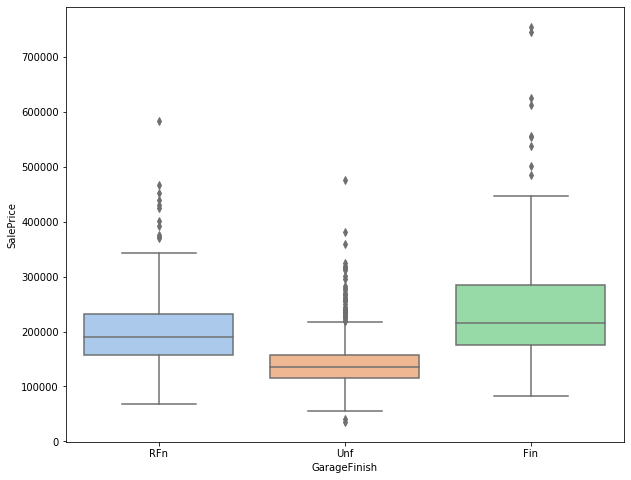

In [79]:
for i in range(1,len(houses.select_dtypes(exclude=['int64','float64']).columns)+1):
    plt.figure(figsize=(10,8))
    sns.boxplot(x = houses.select_dtypes(exclude=['int64','float64']).columns[i-1],y = 'SalePrice',data = houses,palette = 'pastel')

The 2Story and 1Story house styles have a higher `SalePrice` in general. Houses with excellent exterior quality are priced higher as compared to the others, same goes for the basement quality, kitchen quality and heating quality. The poured concrete foundation are quite expensive as well. Houses with attached garages and good finishes are quite expensive.

#### 4. Data Preparation

* Imputing the ordinal values

In [80]:
ordinal = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,np.nan:0}

In [81]:
houses['ExterQual'] = houses['ExterQual'].map(ordinal)

In [82]:
houses['HeatingQC'] = houses['HeatingQC'].map(ordinal)

In [83]:
houses['KitchenQual'] = houses['KitchenQual'].map(ordinal)

In [84]:
ordinal = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0}
houses['BsmtQual'] = houses['BsmtQual'].map(ordinal)

In [85]:
exp = {'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0}
houses['BsmtExposure'] = houses['BsmtExposure'].map(exp)

In [86]:
bsmt = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0}
houses['BsmtFinType1'] = houses['BsmtFinType1'].map(bsmt)

* Creating the dummy variables

In [87]:
dummy = houses.select_dtypes(exclude=['int64','float64']).columns
dummies = pd.get_dummies(houses[dummy],drop_first=True)
dummies

,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf
0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1456,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
1457,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
1458,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1


In [88]:
# concatenating with the houses dataset

houses = pd.concat([houses,dummies],axis=1)
houses

,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,House_year_old,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf
0,60,65.0,8450,Reg,CollgCr,2Story,7,5,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,No Fireplace,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,208500,5,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,Reg,Veenker,1Story,6,8,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,181500,31,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,IR1,CollgCr,2Story,7,5,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,223500,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,IR1,Crawfor,2Story,7,5,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,140000,91,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
4,60,84.0,14260,IR1,NoRidge,2Story,8,5,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,250000,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [89]:
houses.drop(dummy,axis = 1,inplace = True)
houses

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,House_year_old,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf
0,60,65.0,8450,7,5,196.0,4,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,2003.0,2,548,0,61,0,0,0,0,0,208500,5,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,3,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,1976.0,2,460,298,0,0,0,0,0,0,181500,31,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,4,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,2001.0,2,608,0,42,0,0,0,0,0,223500,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,3,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,1998.0,3,642,0,35,272,0,0,0,0,140000,91,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
4,60,84.0,14260,8,5,350.0,4,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,2000.0,3,836,192,84,0,0,0,0,0,250000,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,0.0,3,4,1,1,0,0,953,953,5,953,694,0,1647,0,0,2,1,3,1,3,7,1,

* Inspecting the `SalePrice` column

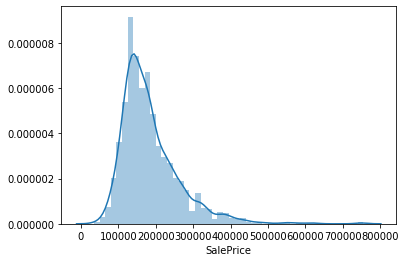

In [90]:
sns.distplot(houses['SalePrice'])

The distribution of the `SalePrice` column is somewhat skewed and is not a proper normal distribution.

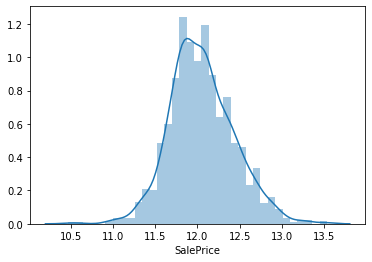

In [91]:
# let us try log transformation

houses['SalePrice'] = np.log(houses['SalePrice'])
sns.distplot(houses['SalePrice'])

The distribution of the `SalePrice` is now a proper normal distribution.

* Train Test Split

In [92]:
X = houses.drop(['SalePrice'],axis = 1)
y = houses['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

#### 5. Modeling

In [93]:
lm = LinearRegression()
rfe = RFE(lm,25)
rfe = rfe.fit(X_train, y_train)

In [94]:
col = X_train.columns[rfe.support_]

In [95]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
lm1 = sm.OLS(y_train,X_train_sm)
lm1 = lm1.fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     186.5
Date:                Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:56:40   Log-Likelihood:                 447.08
No. Observations:                 959   AIC:                            -842.2
Df Residuals:                     933   BIC:                            -715.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.0096      0.049    226.568      0.000      10.914      11.105
OverallQual                  0.1155      0.006     19.081      0.000       0.104       0.127
BsmtFullBath                 0.0988      0.010      9.573      0.000       0.079       0.119
FullBath                     0.1423      0.013     11.054      0.000       0.117       0.168
KitchenAbvGr                -0.1456      0.028     -5.205      0.000      -0.201      -0.091
GarageCars                   0.0887      0.010      8.455      0.000       0.068       0.109
LotShape_IR2                 0.1118      0.028      3.937      0.000       0.056       0.167
Neighborhood_Blueste        -0.2449      0.154     -1.586      0.113      -0.548       0.058
Neighborhood_BrDale         -0.2386      0.050     -4.782      0.000      -0.337      -0.141
Neighborhood_ClearCr         0.1534      0.036      4.317      0.000       0.084       0.223
Neighborhood_Crawfor         0.2119      0.029      7.209      0.000       0.154       0.270
Neighborhood_IDOTRR         -0.1355      0.039     -3.456      0.001      -0.212      -0.059
Neighborhood_MeadowV        -0.2379      0.059     -4.028      0.000      -0.354      -0.122
Neighborhood_NPkVill        -0.2338      0.070     -3.351      0.001      -0.371      -0.097
Neighborhood_NoRidge         0.1704      0.033      5.203      0.000       0.106       0.235
Neighborhood_NridgHt         0.1549      0.025      6.311      0.000       0.107       0.203
Neighborhood_StoneBr         0.2128      0.039      5.462      0.000       0.136       0.289
HouseStyle_1.5Unf           -0.1623      0.053     -3.067      0.002      -0.266      -0.058
Exterior1st_BrkComm         -0.3846      0.110     -3.509      0.000      -0.600      -0.169
Exterior2nd_Stucco          -0.0846      0.040     -2.092      0.037      -0.164      -0.005
Exterior2nd_Wd Shng         -0.1667      0.030     -5.543      0.000      -0.226      -0.108
Foundation_CBlock            0.0965      0.018      5.438      0.000       0.062       0.131
Foundation_PConc             0.0955      0.019      4.915      0.000       0.057       0.134
Foundation_Stone             0.2603      0.080      3.268      0.001       0.104       0.417
FireplaceQu_No Fireplace    -0.1066      0.012     -9.033      0.000      -0.130      -0.083
GarageType_CarPort          -0.1557      0.064     -2.422      0.016      -0.282      -0.030
==============================================================================
Omnibus:                       29.451   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.529
Skew:                          -0.173   Prob(JB):                     1.95e-13
Kurtosis:                       4.160   Cond. No.                     

The R-squared value came out to be 83.3% whereas the Adj. R-squared value came out to be 82.9% with nearly every variable being significant.

The top five feature are identified as:
1. `Foundation_Stone`
2. `Neighborhood_Crawfor`
3. `Neighborhood_StoneBr`
4. `Exterior1st_BrkComm`
5. `Neighborhood_BrDale`


* Ridge Regression

In [96]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [ ]:
ridge = Ridge()

# cross validation
folds = 5
model = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
# the best alpha

model.best_estimator_

In [ ]:
# analysing the negative mean square for different values of alphas

cv = pd.DataFrame(model.cv_results_)
cv

In [ ]:
# plotting mean test and train scoes with alpha 
cv['param_alpha'] = cv['param_alpha'].astype('int32')

# plotting
plt.plot(cv['param_alpha'], cv['mean_train_score'])
plt.plot(cv['param_alpha'], cv['mean_test_score'])
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')

In [ ]:
alpha = 9
ridge1 = Ridge(alpha=alpha)

ridge1.fit(X_train, y_train)

In [ ]:
# predicting on the X_train

ridge_result_train = pd.DataFrame({'y_train':[np.exp(y) for y in y_train],'y_train_pred':[np.exp(y) for y in ridge1.predict(X_train)]})
ridge_result_train

In [ ]:
ridge1.coef_

In [ ]:
ridge1_coefficients = pd.DataFrame({'columns':X_train.columns,'coefficient':ridge1.coef_})
ridge1_coefficients

In [ ]:
ridge1_coefficients.sort_values(by=['coefficient'],ascending=False)

The top five predictor variables in case of ridge regression are

1. Neighborhood_Crawfor
2. Neighborhood_StoneBr
3. Neighborhood_NridgHt	
4. Neighborhood_MeadowV
5. Neighborhood_IDOTRR

In [ ]:
r2_score(ridge_result_train['y_train'],ridge_result_train['y_train_pred'])

In [ ]:
mean_absolute_error(ridge_result_train['y_train'],ridge_result_train['y_train_pred'])

In [ ]:
# predicting on the X_test

ridge_result_test = pd.DataFrame({'y_test':[np.exp(y) for y in y_test],'y_test_pred':[np.exp(y) for y in ridge1.predict(X_test)]})
ridge_result_test

In [ ]:
r2_score(ridge_result_test['y_test'],ridge_result_test['y_test_pred'])

The difference between the r2 score of train set and test set is optimal hence the model is stable and robust.

If we increase the value of alpha twice ie. to 18

In [ ]:
alpha = 40
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train, y_train)

In [ ]:
ridge_result_train_double = pd.DataFrame({'y_train':[np.exp(y) for y in y_train],'y_train_pred':[np.exp(y) for y in ridge2.predict(X_train)]})
ridge_result_train_double

In [ ]:
r2_score(ridge_result_train_double['y_train'],ridge_result_train_double['y_train_pred'])

In [ ]:
mean_absolute_error(ridge_result_train_double['y_train'],ridge_result_train_double['y_train_pred'])

If we increase the value of alpha twice i.e. to 18 the mean absolute error increases from 14787 to 15369 in case of ridge regression.

In [ ]:
ridge2_coefficients = pd.DataFrame({'columns':X_train.columns,'coefficient':ridge2.coef_})
ridge2_coefficients.sort_values(by=['coefficient'],ascending=False)

Upon changing the value of alpha to 18 the top five predictor variables are:

1. Neighborhood_Crawfor
2. OverallQual
3. Neighborhood_NridgHt
4. GarageCars
5. Neighborhood_StoneBr

* Lasso Regression

In [ ]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [ ]:
lasso = Lasso()

# cross validation
folds = 5
model = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model.fit(X_train, y_train)

In [ ]:
# the best alpha

model.best_estimator_

In [ ]:
# analyzing the negative mean squared error for different alpha

cv = pd.DataFrame(model.cv_results_)
cv

In [ ]:
cv['param_alpha'] = cv['param_alpha'].astype('int32')

# plotting
plt.plot(cv['param_alpha'], cv['mean_train_score'])
plt.plot(cv['param_alpha'], cv['mean_test_score'])
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')

In [ ]:
alpha = 0.001
lasso1 = Lasso(alpha=alpha)

lasso1.fit(X_train, y_train)

In [ ]:
# predicting on the X_train

lasso_result_train = pd.DataFrame({'y_train':[np.exp(y) for y in y_train],'y_train_pred':[np.exp(y) for y in lasso1.predict(X_train)]})
lasso_result_train

In [ ]:
# r2 score

r2_score(lasso_result_train['y_train'],lasso_result_train['y_train_pred'])

In [ ]:
# mean absolute error

mean_absolute_error(lasso_result_train['y_train'],lasso_result_train['y_train_pred'])

In [ ]:
lasso1_coefficients = pd.DataFrame({'columns':X_train.columns,'coefficient':lasso1.coef_})
lasso1_coefficients

In [ ]:
# the top predictors

lasso1_coefficients.sort_values(by=['coefficient'],ascending=False)

The top five predictor variabels are:

1. Neighborhood_Crawfor
2. Neighborhood_StoneBr
3. Neighborhood_NridgHt
4. OverallQual
5. GarageCars

In [ ]:
# the no. of columns that have been reduced to 0

len(lasso1_coefficients[lasso1_coefficients['coefficient'] == 0])

In [ ]:
# predicting on X_test

lasso_result_test = pd.DataFrame({'y_test':[np.exp(y) for y in y_test],'y_test_pred':[np.exp(y) for y in lasso1.predict(X_test)]})
lasso_result_test

In [ ]:
# r2 score

r2_score(lasso_result_test['y_test'],lasso_result_test['y_test_pred'])

The difference between the r2 score of train set and test set is optimal hence the model is stable and robust.

In [ ]:
lasso_coefficients = pd.DataFrame({'columns':X_train.columns,'coefficient':lasso1.coef_})
lasso_coefficients

In [ ]:
# columns that have been assigned with 0 coefficient

lasso_coefficients[lasso_coefficients['coefficient'] == 0]

If we double the value of alpha ie. 0.002

In [ ]:
alpha = 0.002
lasso2 = Lasso(alpha=alpha)

lasso2.fit(X_train, y_train)

In [ ]:
lasso_result_train_double = pd.DataFrame({'y_train':[np.exp(y) for y in y_train],'y_train_pred':[np.exp(y) for y in lasso2.predict(X_train)]})
lasso_result_train_double

In [ ]:
mean_absolute_error(lasso_result_train_double['y_train'],lasso_result_train_double['y_train_pred'])

If we increase the value of alpha twice i.e. to 0.002 the mean absolute error increases from 15256 to 15979 in case of lasso regression.

In [ ]:
lasso_result_train_double_coefficients = pd.DataFrame({'columns':X_train.columns,'coefficient':lasso2.coef_})
lasso_result_train_double_coefficients.sort_values(by=['coefficient'],ascending=False)

Upon changing the value of alpha to 0.002 the top five predictor variables are

1. Neighborhood_Crawfor
2. OverallQual
3. Neighborhood_NridgHt
4. GarageCars
5. FireplaceQu_No Fireplace

In [ ]:
# removing the top five predictor variable from the lasso regression model

X_train_new = X_train.drop(['Neighborhood_Crawfor','Neighborhood_StoneBr','Neighborhood_NridgHt','GarageCars','OverallQual'],axis=1)
X_test_new = X_test.drop(['Neighborhood_Crawfor','Neighborhood_StoneBr','Neighborhood_NridgHt','GarageCars','OverallQual'],axis=1)

In [ ]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model.fit(X_train_new, y_train)

In [ ]:
model.best_estimator_

In [ ]:
alpha = 0.0001
lasso_new = Lasso(alpha=alpha)

lasso_new.fit(X_train_new, y_train)

In [ ]:
lasso_result_train_new = pd.DataFrame({'y_train':[np.exp(y) for y in y_train],'y_train_pred':[np.exp(y) for y in lasso_new.predict(X_train_new)]})
lasso_result_train_new

In [ ]:
r2_score(lasso_result_train_new['y_train'],lasso_result_train_new['y_train_pred'])

In [ ]:
mean_absolute_error(lasso_result_train_new['y_train'],lasso_result_train_new['y_train_pred'])

In [ ]:
lasso_new_coefficients = pd.DataFrame({'columns':X_train_new.columns,'coefficient':lasso_new.coef_})
lasso_new_coefficients

In [ ]:
lasso_new_coefficients.sort_values(by=['coefficient'],ascending=False)

The top five predictor variables now are:

1. GarageType_Attchd
2. Foundation_Slab
3. GarageType_BuiltIn
4. MasVnrType_Stone
5. Foundation_PConc